In [23]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import graphviz
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

In [24]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

#### 회귀모델돌리기

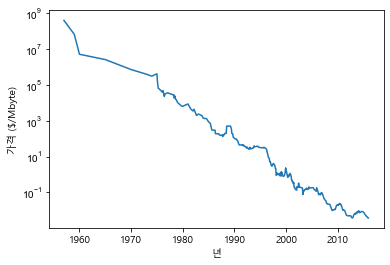

In [25]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")  # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show() 

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [27]:
#년도로 train_test_split하기
train = ram_prices[ram_prices["date"]<2000]
test = ram_prices[ram_prices["date"]>=2000]

In [28]:
X_train = train["date"].to_numpy()[:, np.newaxis]
y_train = train["price"].apply(lambda x : np.log(x))

In [29]:
train

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
197,197,1999.50,7.800000e-01
198,198,1999.67,8.700000e-01
199,199,1999.75,1.040000e+00
200,200,1999.83,1.340000e+00


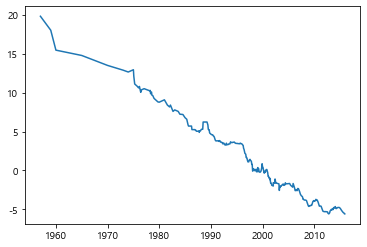

In [30]:
plt.plot(ram_prices["date"],ram_prices["price"].apply(lambda x : np.log(x)))

In [31]:
#선형성을 나타내기 위해서 로그변환함.
train["price"].apply(lambda x : np.log(x))

0      19.834205
1      18.034249
2      15.472382
3      14.787203
4      13.506268
         ...    
197    -0.248461
198    -0.139262
199     0.039221
200     0.292670
201     0.854415
Name: price, Length: 202, dtype: float64

In [32]:
tree_model = DecisionTreeRegressor()
linear_model =LinearRegression()

tree_model.fit(X_train,y_train)
linear_model.fit(X_train, y_train)

LinearRegression()

In [33]:
X = ram_prices["date"].to_numpy()[:,np.newaxis]
y = ram_prices["price"].apply(lambda x : np.log(x))

In [34]:
pred_tree = tree_model.predict(X)
pred_linear = linear_model.predict(X)

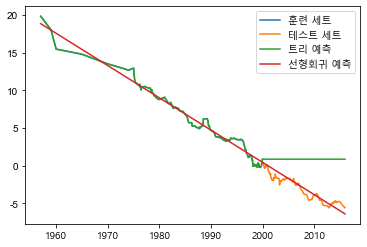

In [35]:
X_test = test["date"].to_numpy()[:,np.newaxis]
y_test = test["price"].apply(lambda x : np.log(x))

plt.yticks(fontname =  "Arial")
plt.plot(X_train,y_train, label="훈련 세트")
plt.plot(X_test, y_test, label="테스트 세트")
plt.plot(X , pred_tree,label="트리 예측")
plt.plot(X , pred_linear,label="선형회귀 예측")
plt.legend()
plt.show()

#### 하이퍼파라미터 튜닝

In [36]:
tree_model = DecisionTreeRegressor(max_depth=4)
linear_model =LinearRegression()

tree_model.fit(X_train,y_train)
linear_model.fit(X_train, y_train)

LinearRegression()

#### mushrooms.csv파일 데이터로 실습

In [37]:
df = pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [39]:
df.describe()
#class가 2 -> 명목형이라 선형성은 없을 것 같고, knn으로 분석 가능 
#확률적모델을 선택해야함 . 
#cap-shape x 이고, cap-surface y 나올 확률(직관적임)
#기하적모델은 좌표에 찍어주는 것 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### 인코딩하기

In [40]:
len(df["cap-shape"].unique())
# 모든 변수가 object임으로 for문을 써서 치환해줘야 함

6

In [41]:
df["cap-shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [42]:
df["cap-surface"].unique()

array(['s', 'y', 'f', 'g'], dtype=object)

In [43]:
range(len(df["cap-shape"].unique()))

range(0, 6)

In [44]:
dic = dict(zip(series.unique(),range(len(series.unique()))))
dic

NameError: name 'series' is not defined

In [ ]:
#명목척도를 자연수로 치환할때 사용가능한 함수
def encode(series):
    dic = dict(zip(series.unique(),range(len(series.unique()))))
    result = series.apply(lambda x : dic[x])
    return result

In [ ]:
for i in df.columns:
    df[i] = encode(df[i])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,0,6,7,0,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,...,0,6,7,0,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,...,0,6,7,0,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,...,3,0,0,0,0,0,1,4,3,6


In [ ]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,-0.112110,0.169663,-0.042028,-0.501530,-0.582015,0.129200,0.348387,0.540024,-0.412869,...,-0.532452,-0.225294,-0.098476,NaN,0.120766,0.152261,-0.556515,-0.560715,-0.155254,-0.191297
cap-shape,-0.112110,1.000000,-0.057205,0.001839,0.120509,0.175229,0.040082,-0.043906,-0.151921,0.218627,...,0.074161,0.073171,0.056450,NaN,0.042988,0.058422,0.099599,0.219476,0.139616,0.169343
cap-surface,0.169663,-0.057205,1.000000,0.016133,-0.047265,-0.106147,-0.186157,0.029686,0.267029,-0.266708,...,0.090350,0.080218,0.092631,NaN,-0.171918,-0.074779,0.107866,-0.283378,0.185359,-0.089972
cap-color,-0.042028,0.001839,0.016133,1.000000,-0.065879,0.115960,-0.163457,-0.012795,0.015113,0.023458,...,-0.042124,-0.063978,-0.065686,NaN,-0.172176,0.184474,0.040785,0.055050,0.070150,0.003142
bruises,-0.501530,0.120509,-0.047265,-0.065879,1.000000,0.588456,0.137359,0.299473,-0.369596,0.325408,...,0.530214,0.267325,0.208451,NaN,0.125606,-0.014367,0.685119,0.543409,-0.008293,0.185130
odor,-0.582015,0.175229,-0.106147,0.115960,0.588456,1.000000,-0.016816,-0.155748,-0.444492,0.599497,...,0.353683,0.214888,0.101501,NaN,-0.056362,-0.009788,0.460625,0.563857,0.277777,0.449061
gill-attachment,0.129200,0.040082,-0.186157,-0.163457,0.137359,-0.016816,1.000000,-0.071489,0.108984,0.184927,...,-0.100591,0.514289,0.595280,NaN,0.842230,0.049642,-0.073149,0.296461,0.164873,0.296916
gill-spacing,0.348387,-0.043906,0.029686,-0.012795,0.299473,-0.155748,-0.071489,1.000000,0.108333,-0.274645,...,-0.112643,-0.309026,-0.233907,NaN,-0.034235,0.206233,-0.038015,-0.173491,-0.474326,-0.341360
gill-size,0.540024,-0.151921,0.267029,0.015113,-0.369596,-0.444492,0.108984,0.108333,1.000000,-0.518717,...,-0.049072,0.186706,0.226610,NaN,0.074866,0.190112,-0.071459,-0.355811,-0.041683,-0.343122
gill-color,-0.412869,0.218627,-0.266708,0.023458,0.325408,0.599497,0.184927,-0.274645,-0.518717,1.000000,...,0.146393,0.188830,0.115547,NaN,0.169267,0.016427,0.181942,0.586547,0.293919,0.557094


In [ ]:
df.corrwith(df["class"]).sort_values()

odor                       -0.582015
spore-print-color          -0.560715
ring-type                  -0.556515
stalk-surface-above-ring   -0.552044
stalk-surface-below-ring   -0.532452
bruises                    -0.501530
gill-color                 -0.412869
stalk-root                 -0.337542
stalk-color-above-ring     -0.225294
habitat                    -0.191297
population                 -0.155254
cap-shape                  -0.112110
stalk-color-below-ring     -0.098476
cap-color                  -0.042028
stalk-shape                 0.102019
veil-color                  0.120766
gill-attachment             0.129200
ring-number                 0.152261
cap-surface                 0.169663
gill-spacing                0.348387
gill-size                   0.540024
class                       1.000000
veil-type                        NaN
dtype: float64

In [ ]:
y=df["class"]
X=df
del X["class"]
del X["veil-type"]
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,2
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,0,0,1,3,1,0,1,10,0,...,0,0,6,7,2,0,0,8,5,6
8120,0,0,0,1,3,1,0,1,10,0,...,0,0,6,7,1,0,0,8,3,6
8121,3,0,0,1,3,1,0,1,1,0,...,0,0,6,7,2,0,0,8,5,6
8122,4,1,0,1,6,0,0,0,8,1,...,0,3,0,0,0,0,1,4,3,6


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6093, 21)
(6093,)
(2031, 21)
(2031,)


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_train,y_train)

1.0

In [ ]:
from sklearn.tree import export_graphviz


export_graphviz(model, out_file='mushroom_tree.dot',
                class_names = ['독','식용'],
                feature_names = X.columns,
                impurity = True,
                filled = True)

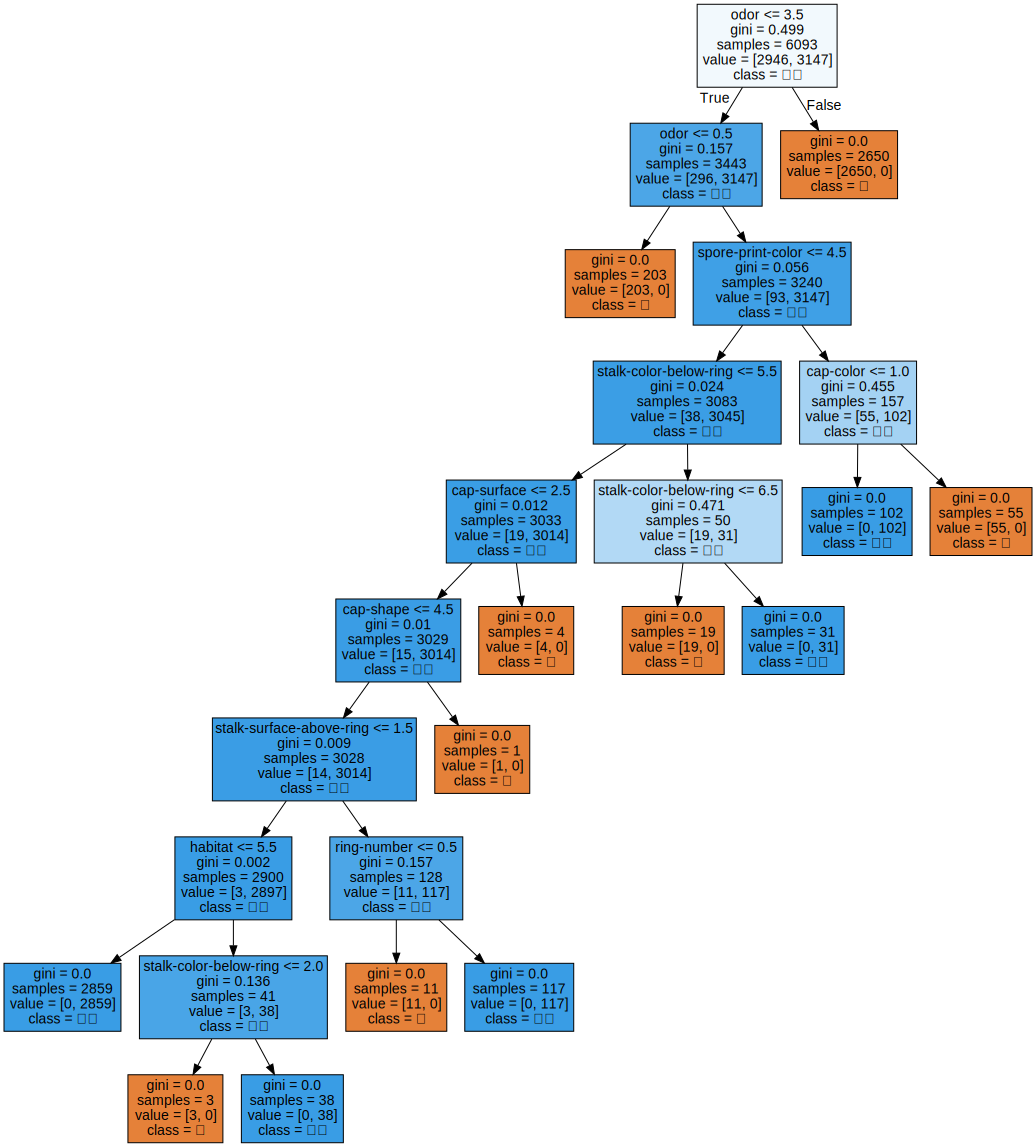

In [ ]:
import graphviz

with open('mushroom_tree.dot', encoding='UTF8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

<BarContainer object of 21 artists>

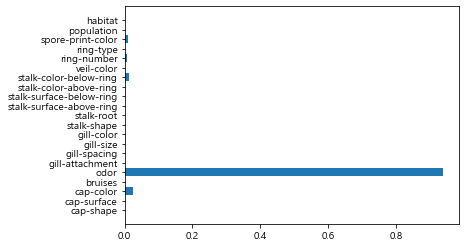

In [ ]:
xlabel = X.columns
plt.barh(X.columns, model.feature_importances_)